<h1><center>TBOS Faculty Development Seminar</center></h1>

<h3><center>Session 2: Statistical Learning</center></h3>
<h3><center>September 19, 2023</center></h3>

Today we explore Chapter 2: "Statistical Learning" from the book *Introduction to Statistical Learning.*

### <font color='red'>*Estimating* $f$</font> 

What is $f$, and why do we want to estimate $f$ from data?

We believe some relationship exists in the world -- education and income, for example.  We define $f$ as a model that describes this relationship, and we set out to figure out what $f$ is.  Statistical learning is simply the process by which we learn $f$ from data.

### <font color='red'>Two Purposes: Prediction and Inference</font>

#### Prediction

We say $\hat{Y} = \hat{f}(X)$ to say that $\hat{f}$ is our best estimate of $f$, and $\hat{Y}$ is our resulting prediction for $Y$ given some input $X$.  When prediction is our goal, accuracy is of utmost importance, even if it costs us some interpretability of $f$.

Our model $\hat{f}$ has two types of error.  The first is known as the reducible error and stems from the fact that $\hat{f}$ is almost certainly not equivalent to $f$.  The other type of error is known as the irreducible error, often labeled $\epsilon$, which cannot be predicted using $X$.  As the authors state, "The focus of this book is on techniques for estimating $f$ with the aim of minimizing the reducible error." (18)

#### Inference

Suppose we want to understand the nature of the association between $Y$ and $X_1, \dots, X_p$.  We still wish to estimate $f$, but interpretability of $f$ is now of utmost importance as our goal is no longer prediction, but rather understanding.  We ask questions like:

* Which predictors (explanatory variables) are associated with the response?

* What is the relationship between the response and each predictor (explanatory variable)? (e.g., Positive/Negative)

* Is the relationship linear or something more complex? (19)

### <font color='red'>Parametric vs. Nonparametric Methods</font>

#### Parametric Methods

1. Assume a model, including the functional form of $X$ in the model (e.g., linear, quadratic, exponential).

2. Use some procedure to *fit* the model (e.g., least squares).

Advantages: Cheap and Easy (computationally efficient, might be "good enough" for many settings)

Disadvantages: Not as Flexible (can't fit an $f$ that is more complex than the model allows)

#### Nonparametric Methods

1. Make no assumptions about the functional form of $X$.

2. Try to fit the model without it becoming too "rough or wiggly."

Advantages: No risk of missing the functional form of $X$

Disadvantages: Typically require a much larger number of observations than parametric models

### <font color='red'>Supervised vs. Unsupervised Methods</font>

#### Supervised Methods

1. There is a natural response variable that our methods seek to relate to the predictors.

2. We are then either trying to predict this response (prediction) or understand the relationship between the predictors and this response (inference).

#### Unsupervised Methods

1. There is no response variable.

2. We seek to understand relationships between the observed variables and between observations.  (Clustering observations is a natural unsupervised learning task.)

### <font color='red'>Regression vs. Classification Problems</font>

#### Regression Problems

*Generally,* we're talking about a quantitative response variable.

#### Classification Problems

*Generally,* we're talking about a qualitative (categorical) response variable.

...but what about logistic regression? Are we predicting classes (categorical) or class probabilities (quantitative)? Yes, I know...it's not the cleanest separation that exists.



### <font color='red'>Assessing Model Adequacy</font>

The *No-Free-Lunch Theorem* for statistical learning: No single method is the best in every situation.  This implies we know to measure what "best" is.

#### Measuring Quality of Fit - Regression

In regression, we typically report mean squared error (MSE):

$$ MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{f}(x_i))^2 $$

Typically this is computed on training data and measures how well $\hat{f}$ *fits* the data.  More helpful than *training MSE* is the *test MSE* that describes how well $\hat{f}$ fits unseen test data.

#### Overfitting

A common occurrence in statistical learning is that:

* Increasing model complexity typically drives training MSE down.

* At some point, increasing model complexity any further may drive test MSE up.

This is known as overfitting -- we've started to fit $\hat{f}$ to patterns that occurred by chance rather than true properties of the real $f$.


#### The Bias-Variance Trade-Off

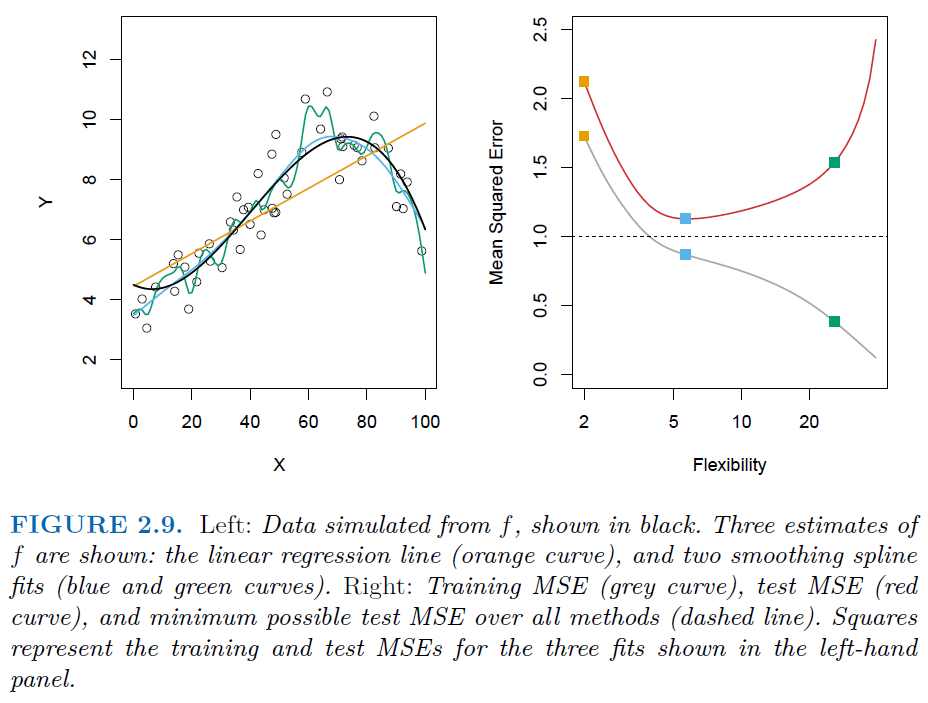

This figure nicely introduces the concepts of bias and variance captured by the equation below:

$$E\left(y_0 - \hat{f}(x_0)\right)^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon)$$

where $E\left(y_0 - \hat{f}(x_0)\right)^2$ defines the expected *test MSE at $x_0$*, averaged over all possible values of $x_0$ in the test set.

$Var(\hat{f}(x_0))$ refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.  High variance methods can produce large changes in $\hat{f}$ resulting from small changes in the training data.  Highly flexible methods are typically high-variance methods.

$Bias(\hat{f}(x_0))$ refers to the gap between the complexity of the real-life problem and the simpler model in use.  A simple linear model would exhibit high bias if the real-life problem is highly nonlinear.  Methods with higher flexibility tend to have lower bias.

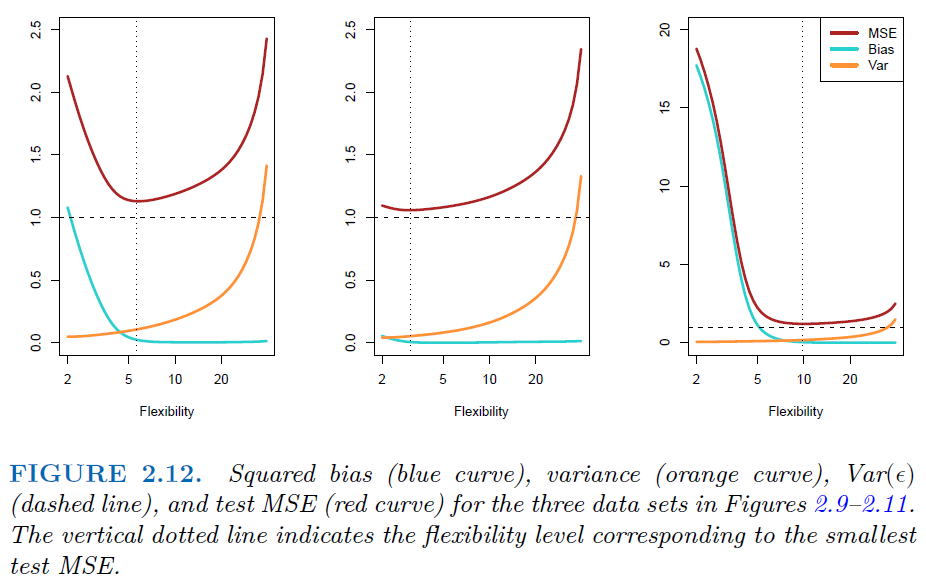

#### Measuring Quality of Fit - Classification

Model performance in classification settings is evaluated by the *error rate*, which is simply the percentage of incorrect classifications:

$$ \text{error rate} = \frac{1}{n}\sum_{i=1}^n(y_i \neq \hat{y}_i) $$

#### Bayes Classifier

It's a simple idea: assign every test observation to the class for which the probability of being in that class is the highest.

$$\hat{y} = \underset{j}{\text{argmax}}\; \text{Pr}(Y=j\mid X=x_0)$$

This by definition would produce the lowest possible error rate, which is known as the Bayes error rate.

$$ 1-E\left(\underset{j}{\text{max}}\; \text{Pr}(Y=j \mid X)\right) $$

That *sounds* great, but there's one big piece missing: you have to be able to estimate class probabilities -- i.e., the class-conditional distributions $\text{Pr}(Y=j \mid X)$.

We will spend many future sessions studying methods for estimating such probability distributions, which is a core element of any classification algorithm.

### <font color='red'>Let's code!</font>

The Chapter 2 Lab is all about getting set up with an R / Python environment and learning the minimal amount of syntax necessary to load, index, and plot data.  Here we show enough to get started exploring the NHANES data set.

One of the first things we need to do to be able to execute the code tutorials for each chapter is install the ISLP package:

pip install ISLP

We need the National Health and Nutrition Examination Survey data to run the analysis below.  This data was installed locally by running:

pip install nhanes

In [36]:
from nhanes.load import load_NHANES_data, load_NHANES_metadata
import pandas as pd

nhanes_df = load_NHANES_data(year='2017-2018')
metadata_df = load_NHANES_metadata(year='2017-2018')

This NHANES object...what is it?

In [37]:
type(nhanes_df)

pandas.core.frame.DataFrame

Okay, a dataframe...what are the dimensions?

In [38]:
nhanes_df.shape

(8366, 197)

So 8366 observations with 197 columns each.  That's a lot to think about.  Can we just pick a few things to focus on?

In [39]:
nhanes_df.columns

Index(['GeneralHealthCondition', 'EverBreastfedOrFedBreastmilk',
       'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays',
       'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage',
       'AgeFirstFedMilkdays', 'TypeOfMilkFirstFedWholeMilk',
       'TypeOfMilkFirstFed2Milk', 'TypeOfMilkFirstFed1Milk',
       ...
       'DaysSmokedCigsDuringPast30Days', 'AvgCigarettesdayDuringPast30Days',
       'TriedToQuitSmoking', 'TimesStoppedSmokingCigarettes',
       'HowLongWereYouAbleToStopSmoking',
       'UnitOfMeasureDayweekmonthyear_2_SMQ',
       'CurrentSelfreportedHeightInches', 'CurrentSelfreportedWeightPounds',
       'TriedToLoseWeightInPastYear', 'TimesLost10LbsOrMoreToLoseWeight'],
      dtype='object', length=197)

Hmmm, maybe some sort of summary would be more helpful.

In [40]:
nhanes_df.describe()

,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,TypeOfMilkFirstFedFatFreeMilk,TypeOfMilkFirstFedSoyMilk,...,SmokedAtLeast100CigarettesInLife,AgeStartedSmokingCigarettesRegularly,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear
count,1069.000000,8.620000e+02,1.077000e+03,8.910000e+02,1077.000000,1.066000e+03,186.0,36.0,2.0,25.0,...,5533.000000,2.232000e+03,1.014000e+03,974.000000,986.000000,504.000000,4.980000e+02,5776.000000,5828.000000,5087.000000
mean,0.806361,4.116932e+03,1.490785e+04,2.019485e+04,16604.331476,4.753050e+03,11.0,12.0,13.0,14.0,...,0.403398,2.314964e+01,2.487574e+01,12.699179,0.524341,19.537698,4.530120e+01,272.224030,350.995710,0.397680
std,0.395334,5.777897e+04,1.157941e+05,1.358060e+05,121232.078614,5.936962e+04,0.0,0.0,0.0,0.0,...,0.490624,7.203744e+01,1.037607e+01,40.879700,0.499661,124.580707,6.329540e+02,1414.518896,1280.908078,0.489467
min,0.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,5.397605e-79,11.0,12.0,13.0,14.0,...,0.000000,5.397605e-79,5.397605e-79,1.000000,0.000000,1.000000,5.397605e-79,49.000000,72.000000,0.000000
25%,1.000000,6.025000e+01,1.000000e+00,3.640000e+02,121.000000,3.640000e+02,11.0,12.0,13.0,14.0,...,0.000000,1.500000e+01,2.000000e+01,4.000000,0.000000,1.000000,1.000000e+00,63.000000,145.000000,0.000000
50%,1.000000,1.820000e+02,1.000000e+00,3.650000e+02,182.000000,3.650000e+02,11.0,12.0,13.0,14.0,...,0.000000,1.700000e+01,3.000000e+01,10.000000,1.000000,2.000000,2.000000e+00,66.000000,171.500000,0.000000
75%,1.000000,3.650000e+02,9.100000e+01,3.650000e+02,243.000000,3.650000e+02,11.0,12.0,13.0,14.0,...,1.000000,2.000000e+01,3.000000e+01,18.000000,1.000000,4.000000,4.000000e+00,70.000000,208.000000,1.000000
max,1.000000,9.999990e+05,9.999990e+05,9.999990e+05,999999.000000,9.999990e+05,11.0,12.0,13.0,14.0,...,1.000000,9.990000e+02,9.900000e+01,999.000000,1.000000,999.000000,9.999000e+03,9999.000000,9999.000000,1.000000


Interesting - Let's look closer at *CurrentSelfreportedHeightInches* and *CurrentSelfreportedWeightPounds*.

In [41]:
nhanes_df[['CurrentSelfreportedHeightInches',
           'CurrentSelfreportedWeightPounds']].describe()

,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds
count,5776.000000,5828.000000
mean,272.224030,350.995710
std,1414.518896,1280.908078
min,49.000000,72.000000
25%,63.000000,145.000000
50%,66.000000,171.500000
75%,70.000000,208.000000
max,9999.000000,9999.000000


Obviously, we should stop looking for Bigfoot and start looking for the 9999-inch people weighing 9999 pounds...or perhaps filter them out since they represent missing values.

In [42]:
nhanes_filtered_df = nhanes_df.loc[(nhanes_df['CurrentSelfreportedHeightInches'] < 100) & 
                                   (nhanes_df['CurrentSelfreportedWeightPounds'] < 1000)]
nhanes_filtered_df[['CurrentSelfreportedHeightInches',
           'CurrentSelfreportedWeightPounds']].describe()

,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds
count,5592.000000,5592.000000
mean,66.262876,179.274142
std,4.163351,48.844207
min,49.000000,72.000000
25%,63.000000,145.000000
50%,66.000000,170.000000
75%,69.000000,205.000000
max,82.000000,484.000000


That's more like it.  Let's plot this data.  Our first matplotlib visualization...

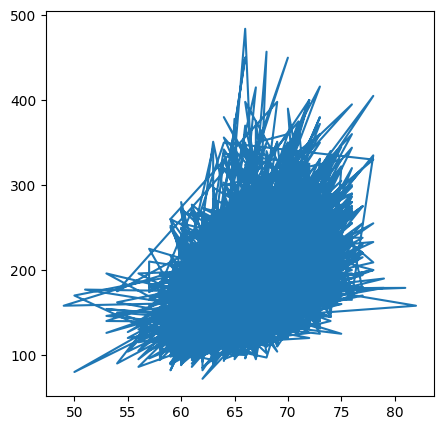

In [43]:
from matplotlib.pyplot import subplots
fig , ax = subplots(figsize=(5, 5))
x = nhanes_filtered_df['CurrentSelfreportedHeightInches']
y = nhanes_filtered_df['CurrentSelfreportedWeightPounds']
ax.plot(x, y);

Yikes, that's terrible.  Let's explore a few plot options.

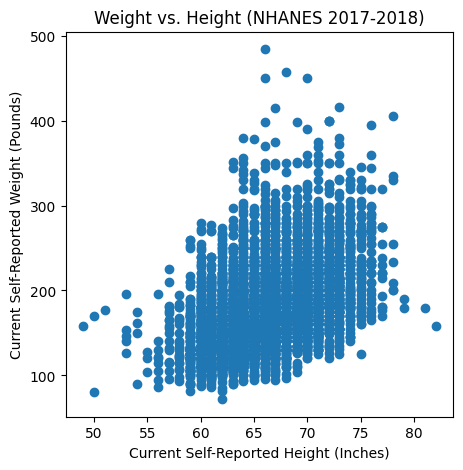

In [44]:
fig, ax = subplots(figsize=(5, 5))
ax.scatter(x, y, marker='o')
ax.set_xlabel("Current Self-Reported Height (Inches)")
ax.set_ylabel("Current Self-Reported Weight (Pounds)")
ax.set_title("Weight vs. Height (NHANES 2017-2018)");

Here we have a classic case of overplotting.  Discretizing height to whole numbers of inches greatly reduces our ability to sense the *density* of the points in the middle of this scatter plot.  Let's look at a smaller sample...and jitter it.

In [45]:
import numpy as np

# Pick 500 people to include.
indices_to_keep = np.random.choice(x.shape[0], 500)
indices_to_keep

array([1770, 3182, 3708, 2265, 2352, 2111, 2601, 2926, 2109,  772, 2126,
       5360,  485, 2953, 3750,  615, 2047, 1200, 2639, 1535, 5220,  587,
        921, 3341, 4040, 4382, 4911, 4709, 2416,  493,  903, 5207, 1340,
       4286, 3272,  111, 4222, 3460, 1515, 3688, 4705, 3604, 3762, 4832,
       3125,  485, 2054, 5583, 1044,  796, 3058, 3972, 2843, 5504,   91,
        557,  265, 2124,  144, 3096,   63, 1744, 4039,  435, 3817, 1424,
       2293, 3282, 2813, 2067, 2063, 1936, 1054, 3240, 5497, 3208,   58,
        625, 1520, 2245, 4328, 5528, 3830, 1274,   47, 1671, 5490,   27,
        521, 4339, 3876, 3976, 3007, 3029, 3694, 1995, 2032, 3202, 2301,
       4931,  631, 3956, 3433, 5059, 1321,   70, 3131, 3202, 3617, 1861,
       5069,  498, 2291, 3143, 3822, 3083,  855, 3011, 4711, 4234,  733,
       4783, 3445, 5257, 2230, 2174, 5312, 1642, 4560, 1947, 2393, 1740,
       5197, 3615, 5464, 2040,  601, 3220, 2411, 1689, 1691, 2973, 2811,
       3988, 5302, 4414, 2077, 3108, 3335, 5209, 48

Next, we'll restrict our original sample to just the 500 randomly selected people, and we'll add a small amount of noise to each dimension to hopefully *uncover* some masked points.

In [46]:
x_sample = x.iloc[indices_to_keep] + np.random.normal(0,.25,500)
y_sample = y.iloc[indices_to_keep] + np.random.normal(0,1,500)

Let's make a new plot of this smaller, jittered sample.

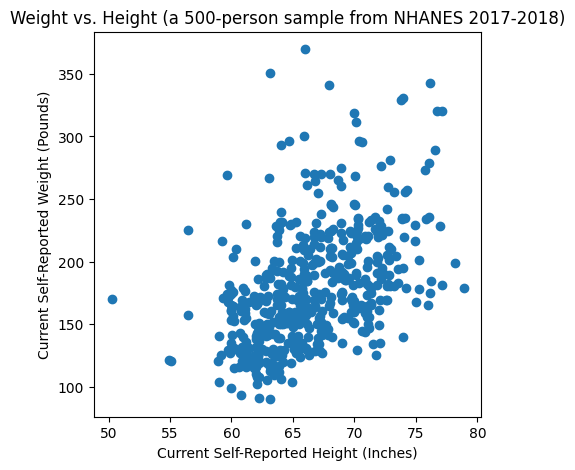

In [47]:
fig, ax = subplots(figsize=(5, 5))
ax.scatter(x_sample, y_sample, marker='o')
ax.set_xlabel("Current Self-Reported Height (Inches)")
ax.set_ylabel("Current Self-Reported Weight (Pounds)")
ax.set_title("Weight vs. Height (a 500-person sample from NHANES 2017-2018)");

### What should we do next?

Maybe we could fit a model to this data that relates weight to height.  Maybe a linear model would be appropriate.  Maybe Eric will show us how to do that next week.